In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn import linear_model
import numpy as np
from scipy import stats

In [144]:
#climate data
ds = pd.read_csv('./data/processed/TERRACLIMATE_processed.csv')
ds.index = pd.to_datetime(ds.date)
#ndvi data
ndvi = pd.read_csv('./data/csv/LANDSAT_NDVI_EVI_ikhnart_v1_long_2019-06-24.csv')
ndvi.index = pd.to_datetime(ndvi.img_date)
ipoints = pd.read_csv('./data/csv/ikhnart_points_v1.csv')

df = ds.groupby(['date']).agg('median')
df.index = pd.to_datetime(df.index)
subdf = df['19851201':'20190901']
#get livestock data
livestock = pd.read_csv('./data/csv/livestock_counts.csv')

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: FutureWarning: 'date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  if __name__ == '__main__':


In [4]:
month_to_season_dct = {
    1: 'DJF', 2: 'DJF',
    3: 'MAM', 4: 'MAM', 5: 'MAM',
    6: 'JJA', 7: 'JJA', 8: 'JJA',
    9: 'SON', 10: 'SON', 11: 'SON',
    12: 'DJF'
}
month_to_name_dct = {
    1: 'JAN', 2: 'FEB',
    3: 'MAR', 4: 'APR', 5: 'MAY',
    6: 'JUN', 7: 'JUL', 8: 'AUG',
    9: 'SEP', 10: 'OCT', 11: 'NOV',
    12: 'DEC'
}
grp_ary = [month_to_season_dct.get(t_stamp.month) for t_stamp in df.index]
mon_ary = [month_to_name_dct.get(t_stamp.month) for t_stamp in df.index]
df['season'] = grp_ary
df['month'] = mon_ary

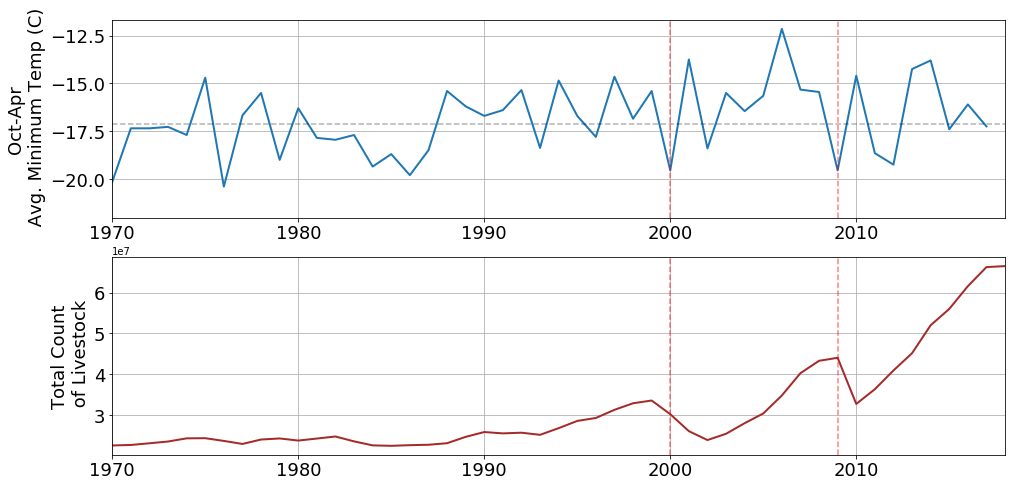

In [5]:
offset = subdf.index[0].year-df.index[0].year
offset = 0
years = np.arange(df.index[0].year, df.index[-1].year+1)
years = years[offset:-1]
mvmask = [[(df.index > '%s-10-1'%y) & (df.index <= '%s-04-30'%(y+1))] for y in years]
var='tmmn'
non_season_avg = [df.loc[mask[0]].median()[var]*0.1 for mask in mvmask]
f,ax = plt.subplots(2,1,figsize=(16,8))
ax[0].plot(years,non_season_avg,lw=2)
ax[0].axhline(np.mean(non_season_avg),color='k',ls='--',alpha=0.3)
'''
ax[0].fill_between(y1, mosaic, mu_arr[i],\
                   where = mu_arr[i]<=mosaic, facecolor=colors[i][0], alpha=0.1,interpolate=True)
ax[0].fill_between(y1, mosaic, mu_arr[i],\
                   where = mu_arr[i]<=mosaic, facecolor=colors[i][0], alpha=0.1,interpolate=True)
'''
ax[1].plot(livestock.year,livestock.livestock, color='brown', lw=2)

ax[0].axvline(2009,color='r',ls='--',alpha=0.5)
ax[0].axvline(2000,color='r',ls='--',alpha=0.5)
ax[1].axvline(2009,color='r',ls='--',alpha=0.5)
ax[1].axvline(2000,color='r',ls='--',alpha=0.5)

ax[0].set_xlim(1970,2018)
ax[1].set_xlim(1970,2018)
ax[0].set_ylabel('Oct-Apr\n Avg. Minimum Temp (C)',fontsize=18)
ax[1].set_ylabel('Total Count\n of Livestock',fontsize=18)
ax[0].tick_params(axis='both',labelsize=18)
ax[1].tick_params(axis='both',labelsize=18)
ax[0].grid()
ax[1].grid()
f.savefig('./out/MinTemp_Livestock.png',dpi=200,bbox_inches='tight')

18.437704918032793


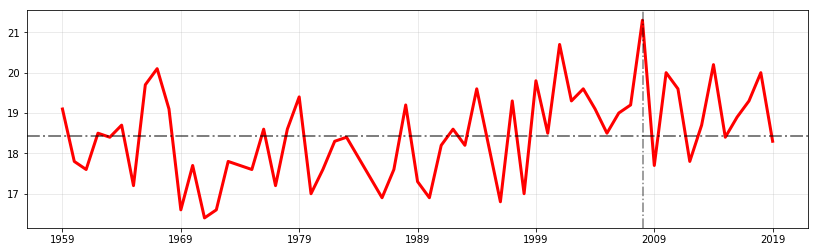

In [6]:
f,ax = plt.subplots(1,1,figsize=(14,4))
var ='tmmx'
scale = 0.1
#ssn = month_to_season_dct[6]
#q = 'QS-JUN'
color = 'red'
#ts = df[df.season==ssn].resample(q)
ts = df[(df.season=='MAM') | (df.season=='JJA') |(df.season=='SON')].resample('1y')
mu = np.mean(ts.median()[var]*scale)
ax.plot((ts.median()[var]*scale).dropna(), lw=3, color=color)
#ax.plot((ts.max()[var]*scale).dropna(),color=color,\
#        ls='--', alpha=0.2)
#ax.plot((ts.min()[var]*scale).dropna(), ls='--', \
#        color=color, alpha=0.2)
ax.grid(alpha=0.3)
print(mu)
ax.axhline(mu, color='k', linestyle='-.', alpha=0.5, lw=2)
ax.axvline(pd.to_datetime('2008-01-30-00:00:00'), color='k', linestyle='-.', alpha=0.5)

-21.880376344086024


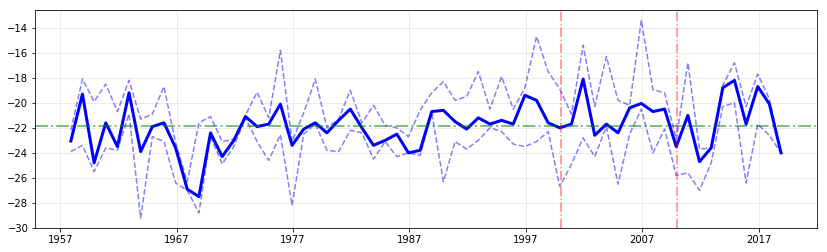

In [7]:
f,ax = plt.subplots(1,1,figsize=(14,4))
ssn = month_to_season_dct[12]
q = 'QS-DEC'
var ='tmmn'
scale = 0.1
color = 'blue'
ts = df[df.season==ssn].resample(q)
#ts = df[((df.month=='NOV')|df.month=='DEC')|(df.month=='JAN')|(df.month=='FEB')].resample('1y')
mu = np.mean(ts.median()[var]*scale)
mu = np.mean(ts.mean()[var]*scale)
ax.plot((ts.median()[var]*scale).dropna(), lw=3, color=color)
ax.plot((ts.max()[var]*scale).dropna(),color=color,\
        ls='--', alpha=0.5)
ax.plot((ts.min()[var]*scale).dropna(), ls='--', \
        color=color, alpha=0.5)
ax.grid(alpha=0.3)
print(mu)
ax.axhline(mu, color='g', linestyle='-.', alpha=0.5, lw=2)
ax.axvline(pd.to_datetime('1999-12-31-00:00:00'), color='r', linestyle='-.', alpha=0.5)
ax.axvline(pd.to_datetime('2009-12-31-00:00:00'), color='r', linestyle='-.', alpha=0.5)


In [98]:
ndvi_mu = ndvi.groupby(['img_date']).agg('median')
ndvi_mu.index = pd.to_datetime(ndvi_mu.index)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: 'img_date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


In [9]:
ts ='1y'
ndvi_resample = ndvi_mu.resample(ts).median()
var = 'pdsi'
scale = 0.01
climate_resample = subdf[[var]].resample(ts).median()*scale

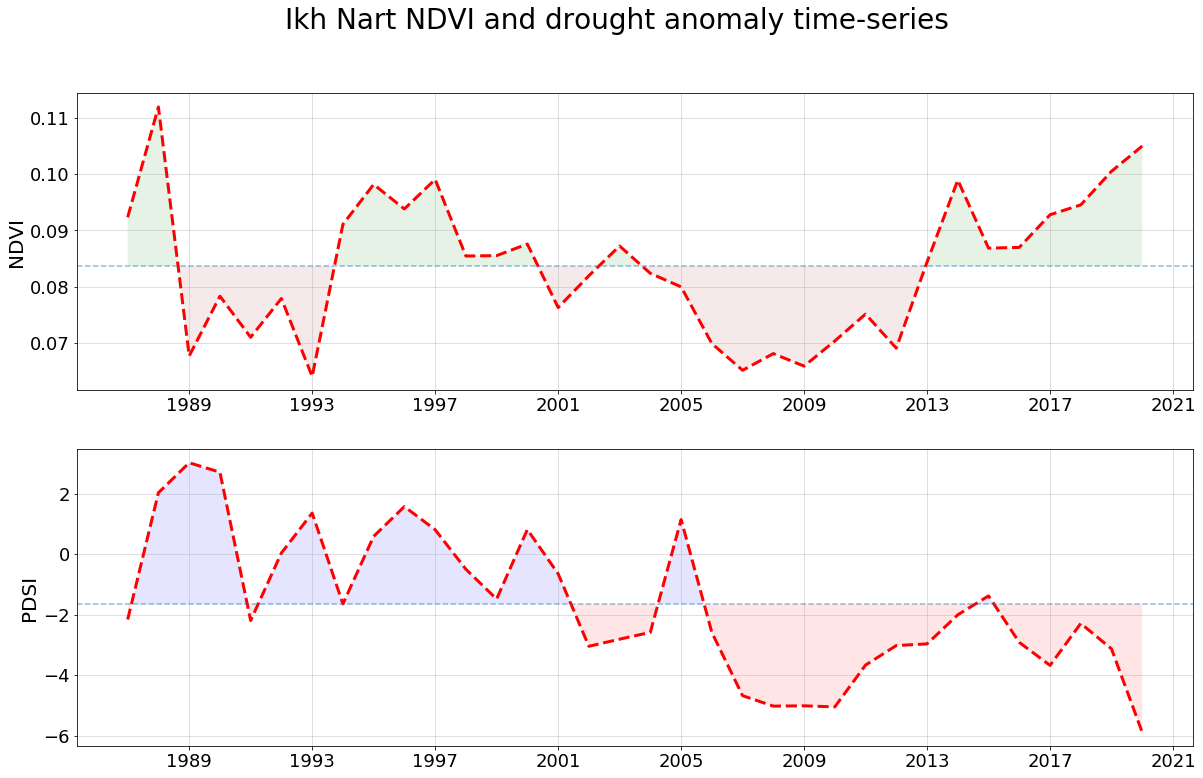

In [10]:
y1 = ndvi_resample.index
x = np.array([ndvi_resample.NDVI, climate_resample[var]])
mus = np.mean(x, axis=1)
mu_arr = [mus[0]*np.ones(len(y1)),\
         mus[1]*np.ones(len(y1))]
r=2
colors = [('green','brown'),('blue','red')]
ylabels = ['NDVI', 'PDSI']
f, ax = plt.subplots(r,1,figsize=(20,12))
for i in range(r):
    ax[i].plot(y1,x[i], color='red',ls='--', lw=3)
    ax[i].axhline(mus[i],alpha=0.5,ls='--')
    ax[i].fill_between(y1, x[i], mu_arr[i],\
                       where = mu_arr[i]<x[i], facecolor=colors[i][0], alpha=0.1,interpolate=True)
    ax[i].fill_between(y1, x[i], mu_arr[i],\
                       where = mu_arr[i]>=x[i], facecolor=colors[i][1], alpha=0.1,interpolate=True)

    ax[i].tick_params(axis='both', labelsize=18)
    ax[i].grid(alpha=0.5)
    ax[i].set_ylabel('%s'%ylabels[i], fontsize=20)
f.suptitle('Ikh Nart NDVI and drought anomaly time-series',\
          fontsize=28)
f.savefig('./out/ikhnart_NDVI_annual_climate_series.png', dpi=100, bbox_inches='tight')

In [92]:
key = ['%s-%s'%(l,i) for l,i in zip(ndvi.location,ndvi.img_date)]

In [89]:
ndvi_grouped = ndvi.groupby('location').resample('1y').mean()
len(ndvi_grouped)

10200

In [200]:
pr_grouped = ds.groupby('PlotKey')[['pr']].resample('1y').agg('sum')
t_grouped = ds.groupby('PlotKey')[['tmmx','tmmn']].resample('1y').mean()

In [205]:
pr_grouped.index

MultiIndex(levels=[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 

In [11]:
y = ndvi_resample.NDVI
X = pd.DataFrame(df.resample('1y').mean()[['tmmx', 'tmmn']])*0.1
X['pr'] = df.resample('1y').sum()['pr']
X = X.loc[y.index[0]:] 
y = y.loc[:X.index[-1]]

In [12]:
lm = linear_model.LinearRegression()
lmodel = lm.fit(X,y)
prediction = lmodel.predict(X)
print(prediction)

[0.09061504 0.08968244 0.08865884 0.08203799 0.08830982 0.08549242
 0.08328169 0.08798214 0.08841895 0.08827518 0.08057634 0.08994618
 0.09038498 0.08363677 0.07701162 0.07730991 0.07668199 0.08140757
 0.07486122 0.07625983 0.07699265 0.07489147 0.08112819 0.08431987
 0.07209428 0.07797148 0.08249068 0.08984839 0.08337354 0.07747927
 0.09197493 0.0840386  0.08264897]


In [17]:
cmip = pd.read_csv('./data/csv/cmip5_annual.csv')
cmip_model = ['ACCESS1-0', 'CESM1-BGC', 'GFDL-ESM2G', 'MIROC-ESM-CHEM', 'MPI-ESM-MR' ]
var = ['tmmx', 'tmmn', 'pr']
yhat = []
for v in cmip_model:
    cols = [c for c in cmip.columns.values if v in c]
    Xpred = cmip[cols]
    yhat.append(lmodel.predict(Xpred))
yhat = np.array(yhat)
cmip.index = pd.DatetimeIndex(cmip.year)


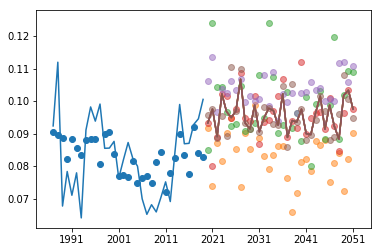

In [24]:
plt.plot(y.index,y)
plt.scatter(y.index,prediction)
yhens = np.median(yhat,axis=0)
for yh in yhat:
    plt.scatter(cmip.index,yh, alpha=0.5)
    plt.plot(cmip.index,yhens)

In [14]:
import rasterio
from glob import glob
model_l = ['ACCESS1-0', 'CESM1-BGC', 'GFDL-ESM2G', 'MIROC-ESM-CHEM', 'MPI-ESM-MR' ]
model = ['access', 'cesm', 'gfdl', 'miroc', 'mpi']

year = np.arange(2019,2031)
tmx_mu_arr =np.ones(len(year))*tmx_mu
tmn_mu_arr =np.ones(len(year))*tmn_mu
pr_mu_arr = np.ones(len(year))*pr_mu

f,ax = plt.subplots(3,1,figsize=(20,18))
ax[0].plot(year,tmx_mu_arr,ls='--',lw=3, color='black')
ax[1].plot(year,tmn_mu_arr,ls='--',lw=3, color='black')
ax[2].plot(year,pr_mu_arr,ls='--',lw=3, color='black')
tmx_avg = []
tmn_avg = []
pr_avg = []
for m,ml in zip(model,model_l):
    k = sorted(glob('./data/projections/*%s*tas*.tif'%m))
    m_imgs = [rasterio.open(i) for i in k]
    tasmin = np.array([np.mean(i.read(1))-273.15 for i in m_imgs])
    tmn_avg.append(tasmin)
    tasmax = np.array([np.mean(i.read(2))-273.15 for i in m_imgs])
    tmx_avg.append(tasmax)
    k = sorted(glob('./data/projections/*%s*pr*.tif'%m))
    m_imgs = [rasterio.open(i) for i in k]
    pr = np.array([np.mean(i.read(1))*86400 for i in m_imgs])
    pr_avg.append(pr)
    ax[0].plot(year, tasmax, alpha=0.5, label='%s'%ml, lw=0.5)
    ax[1].plot(year, tasmin, alpha=0.5, label='%s'%ml, lw=0.5)
    ax[2].plot(year, pr, alpha=0.5, label='%s'%ml, lw=0.5)
tmx_ens = np.mean(np.array(tmx_avg),axis=0)
tmn_ens = np.mean(np.array(tmn_avg),axis=0)
pr_ens = np.mean(np.array(pr_avg),axis=0)

ax[0].plot(year,tmx_ens, lw=3, color='purple')
ax[1].plot(year,tmn_ens, lw=3, color='purple')
ax[2].plot(year,pr_ens, lw=3, color='purple')
ax[0].fill_between(year, tmx_ens, tmx_mu_arr,\
                   where=tmx_mu_arr<=tmx_ens, facecolor='brown', alpha=0.1,interpolate=True)
ax[1].fill_between(year, tmn_ens, tmn_mu_arr,\
                   where=tmn_mu_arr<=tmn_ens, facecolor='brown', alpha=0.1,interpolate=True)
ax[2].fill_between(year, pr_ens, pr_mu_arr,\
                   where=pr_mu_arr<=pr_ens, facecolor='blue', alpha=0.1,interpolate=True)
ax[2].fill_between(year, pr_ens, pr_mu_arr,\
                   where=pr_mu_arr>=pr_ens, facecolor='brown', alpha=0.1,interpolate=True)

ax[0].tick_params(axis='both', labelsize=16)
ax[1].tick_params(axis='both', labelsize=16)
ax[2].tick_params(axis='both', labelsize=16)
ax[0].legend(fontsize=13)
ax[1].legend(fontsize=13)
ax[2].legend(fontsize=13)
ax[0].grid(alpha=0.5)
ax[1].grid(alpha=0.5)
ax[2].grid(alpha=0.5)

ax[0].set_ylabel('Max Temperature \n(C)', fontsize=20)
ax[1].set_ylabel('Min Temperature \n(C)', fontsize=20)
ax[2].set_ylabel('Precipitation \n(mm)', fontsize=20)
f.savefig('./out/projection_timeseries.png', bbox_width='tight', dpi=300)

NameError: name 'tmx_mu' is not defined

In [ ]:
#fit a multiple linear regreassion of annual NDVI  to annual min/max temp and precip
